# **Ciencia e Ingeniería Computacional**

## NOMBRE: FELIPE ALEXANDER CORREA RODRÍGUEZ

## FECHA: 10 DE NOVIEMBRE DE 2024

## CURSO: COM4201-1

Se tiene el siguiente modelo o idea de deposición balística y se pretende hacer simulaciones y gráficos que describan la deposición con cierta cantidad de partículas y los cambios en altura, capas, rugosidad entre otros valores y detalles de interés.

En el modelo propuesto, se define una posición aleatoria por encima de la superficie, y dejamos una partícula caer directamente sobre esta. La partícula se pega al primer sitio a lo largo de su trayectoria que tenga un vecino cercano ocupado. Existen casos o lógicas similares como la del tetris, que también es posible modelar bajo estas reglas.

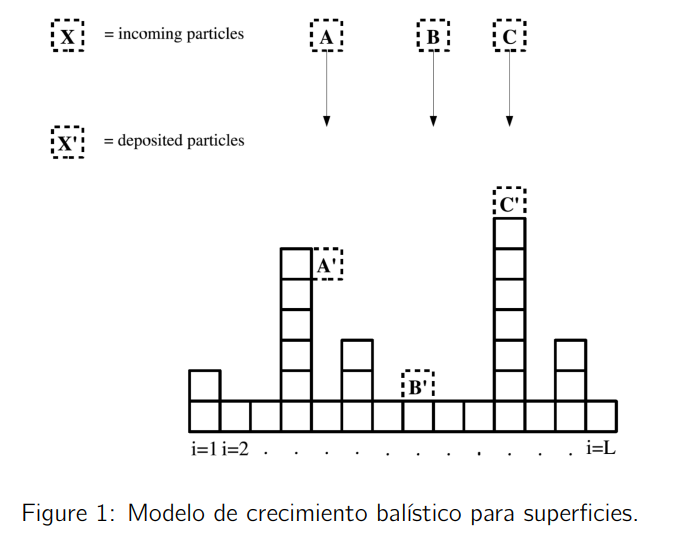

# **PREGUNTA 1 / PARTE A**

 A partir de estas reglas, se escribe un programa (en python debido a su lista de librerías, ejemplo: matplotlib) que genera un clúster para un tamaño horizontal del sistema L. Al final, el resultado del programa muestra lo que sería una imagen del sistema luego de haber depositado un total de NT = 50000 partículas en un sistema de tamaño L = 250.

 La lógica de la aplicación de las reglas es la siguiente: Se tiene un valor chi y psi, chi se selecciona aleatoriamente usando random.randint(0, L-1), lo que asegura que la partícula pueda caer en cualquiera de las 𝐿 columnas del sistema. Luego tenemos a psi que inicialmente es igual a la altura actual de la columna 𝑆[𝜒], incrementada en 1 (S[chi] + 1). Esto asegura que las partículas se depositen justo encima de la superficie actual de esa columna. Y en pocas palabras, se busca el vecino más alto en las columnas adyacentes (𝜒−1 y 𝜒+1), y psi se ajusta para que la partícula pueda "pegarse" en el borde de un vecino si es más alto. Esto simula el comportamiento típico de la deposición balística, donde las partículas tienden a adherirse a superficies más altas cercanas.

 Hay otras formas (algoritmos) de aplicar esta adhesión, aunque no se explorarán para esta visualización e investigación.


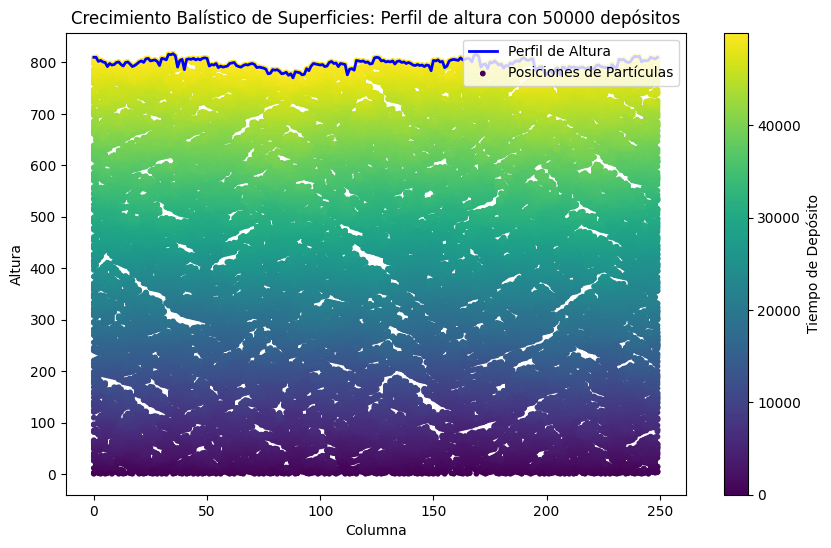

In [23]:
import numpy as np  #-importar numpy que sirve para array, matrices y cosas
import random       #-importar random que da la posición aleatoria
import math         #-importar math para cosas de matemáticas
import matplotlib.pyplot as plt  #-importar matplotlib para graficar

#-función de depósito de partículas (Depósito Balístico/Randomness)
def deposito_balístico(N, S, L, rango_pegado, condiciones_periodicas):
    global idum
    #para guardar las posiciones de las partículas
    posiciones_depositadas = []
    #para guardar el tiempo de cada depósito
    tiempos_deposito = []
    for t in range(N):
        chi = random.randint(0, L-1)
        psi = max(S[chi] + 1, 0)  #la altura mínima será 0

#-ojo que: 1. chi; representa la columna (posición horizontal) donde cae la partícula. 2. psi; determina la altura vertical a la que se deposita la partícula.
        if rango_pegado > 0: #aquí ajustamos la altura de la partícula para que se deposite en la columna seleccionada de acuerdo con la altura más alta de sus columnas vecinas (izquierda y derecha)
            chi_izquierda = max(chi - 1, 0)
            chi_derecha = min(chi + 1, L-1)
            max_vecino = max(S[chi_izquierda], S[chi_derecha])
            psi = max(psi, max_vecino + 1)
            #si hay un rango_pegado > 0, la partícula tiende a "pegarse" a la altura de los vecinos, asegurando que el depósito
            #se haga sobre una superficie más alta y no en un hueco. básicamente el comportamiento o idea de los modelos balísticos.

        S[chi] = psi  #se actualiza la altura del sitio
        posiciones_depositadas.append((chi, psi))  #guardar la posición de la partícula
        tiempos_deposito.append(t)  #guardar el "tiempo" del depósito

#-si se activa el comportamiento periódico, las partículas que llegan al borde izquierdo del sistema se "reciclan" hacia el borde derecho, y viceversa. estructura cíclica en vez de bordes fijos.
        if condiciones_periodicas == 'y':
            if chi == 0: S[L-1] = psi
            elif chi == L-1: S[0] = psi
    return S, posiciones_depositadas, tiempos_deposito

#configuración inicial de la simulación (o sea tener todo desde capa mínima o abajo)
def configurar(L):
    S = np.zeros(L, dtype=int)  #inicializar el perfil de alturas con 0
    return S

#función para graficar resultados con ramificación y evolución temporal
def graficar_resultados(S, L, posiciones_depositadas, tiempos_deposito):
    fig, ax = plt.subplots(figsize=(10, 6))
    #lo siguiente grafica las alturas del sistema
    ax.plot(range(L), S, color='blue', label='Perfil de Altura', linewidth=2)
    #lo siguiente normaliza el tiempo de depósito
    norm = plt.Normalize(vmin=min(tiempos_deposito), vmax=max(tiempos_deposito))
    cmap = plt.cm.viridis  # Usar una paleta de colores atractiva

    #para graficar las posiciones de las partículas con colores según el tiempo de depósito
    posiciones_depositadas = np.array(posiciones_depositadas)
    scatter = ax.scatter(posiciones_depositadas[:, 0], posiciones_depositadas[:, 1],
                         c=tiempos_deposito, cmap=cmap, s=10, label='Posiciones de Partículas')

    #añadir barrita de color para el tiempo de depósito
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Tiempo de Depósito')

    ax.set_title(f"Crecimiento Balístico de Superficies: Perfil de altura con {len(posiciones_depositadas)} depósitos")
    ax.set_xlabel("Columna")
    ax.set_ylabel("Altura")
    ax.legend()
    plt.show() #mostramos

#-función master para ejecutar la simulación
def main():
    L = 250  #-longitud del sistema (número de columnas)
    N = 50000  #-número de partículas/proyectiles a depositar
    rango_pegado = 1  #-rango de pegado (modelo B)
    condiciones_periodicas = 'y'  #-usar condiciones periódicas

    #iniciar el perfil de altura
    S = configurar(L)

    #aquí vienen partículas y obtener sus posiciones
    S, posiciones_depositadas, tiempos_deposito = deposito_balístico(N, S, L, rango_pegado, condiciones_periodicas)

    #muestra resultados con ramificación y colores por tiempo de depósito
    graficar_resultados(S, L, posiciones_depositadas, tiempos_deposito)

#la de siempre
if __name__ == "__main__":
    main()


Ya hecha la deposición de las 50000 partículas en los 250 de largo, lo que conseguimos es una imagen que describe cómo una superficie se forma al depositar partículas de manera aleatoria, y cómo esta superficie evoluciona con el tiempo. Los huecos que se ven son aquellos puntos donde las partículas encontraron un vecino y por lo tanto se formaron estructuras y no se rellenaron esos huecos cercanos. Esta visualización al ser aleatoria en la posición horizontal, variará para cada aplicación/repetición, lo mismo los gráficos que preceden.

Por otro lado y para efectos de visualización, se aplicó un mapa de color para representar las alturas, aunque  a mayor cantidad de partículas se hace más difícil ver las ramificaciones específicas que toman estos clúster de partículas.

También se tiene en línea irregular azúl lo que sería el último punto o demarcación dejado por las capas de partículas.

Ahora, solo para revisar, veamos el caso de una superficie más pequeña y menos partículas que ayuden a ver mejor las ramificaciones o uniones.

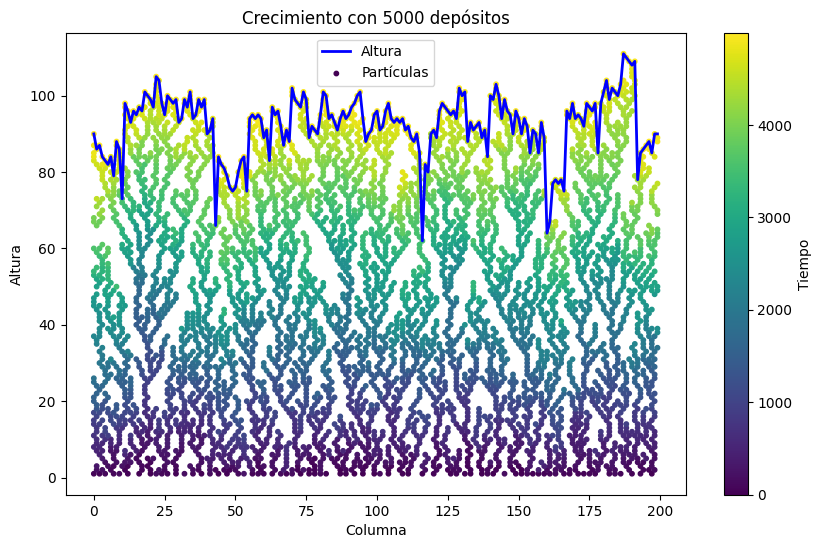

In [24]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

def dep_bal(npart, perfil, longi, rango, peri):
    pos_dep = []
    tiempo_dep = []
    for ind in range(npart):
        col = random.randint(0, longi-1)
        altura = max(perfil[col] + 1, 0)
        if rango > 0:
            izq = max(col - 1, 0)
            der = min(col + 1, longi-1)
            alt_max = max(perfil[izq], perfil[der])
            altura = max(altura, alt_max + 1)
        perfil[col] = altura
        pos_dep.append((col, altura))
        tiempo_dep.append(ind)
        if peri == 's':
            if col == 0: perfil[longi-1] = altura
            elif col == longi-1: perfil[0] = altura
    return perfil, pos_dep, tiempo_dep

def ini_bal(longi):
    perfil = np.zeros(longi, dtype=int)
    return perfil

def graficar(perfil, longi, pos_dep, tiempo_dep):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(range(longi), perfil, color='blue', label='Altura', linewidth=2)
    norm = plt.Normalize(vmin=min(tiempo_dep), vmax=max(tiempo_dep))
    cmap = plt.cm.viridis
    pos_dep = np.array(pos_dep)
    scatter = ax.scatter(pos_dep[:, 0], pos_dep[:, 1], c=tiempo_dep, cmap=cmap, s=10, label='Partículas')
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Tiempo')
    ax.set_title(f"Crecimiento con {len(pos_dep)} depósitos")
    ax.set_xlabel("Columna")
    ax.set_ylabel("Altura")
    ax.legend()
    plt.show()

def main_bal():
    longi = 200
    npart = 5000
    rango = 1
    peri = 's'
    perfil = ini_bal(longi)
    perfil, pos_dep, tiempo_dep = dep_bal(npart, perfil, longi, rango, peri)
    graficar(perfil, longi, pos_dep, tiempo_dep)

if __name__ == "__main__":
    main_bal()



Aquí en este gráfico especial con pocas partículas y un L ligeramente menor, podemos ver cómo se ven las ramificaciones según las reglas de deposición, esto es como haber hecho un zoom a la estructura, ya que en el caso de 50000 partículas, si bien ocurre lo mismo, se tiene que la estructura se presenta mucho más unida o junta, por la cantidad de partículas.

# **PREGUNTA 2 Y 3 / PARTE B Y C**

 Se define la altura promedio por

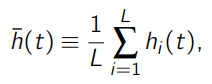

donde h(t) es la altura de la columna i en el tiempo t. Usualmente es más conveniente medir el tiempo en unidades de capas depositadas, así t = N/L, donde N es el número de partículas depositadas y L es la longitud del sistema. Se hará un código a partir del análisis anterior que muestra que para tiempos largos, h(t) crece linealmente.

Por otro lado, se define la rugosidad del clúster por

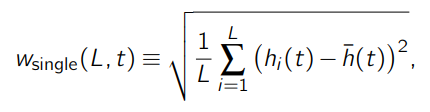

donde single se refiere a que el cálculo se hace para una realización en particular. Nótese que esta definición corresponde a la desviación estándar de h(t). Ahora, usando L = 500, se realizará un gráfico del comportamiento de
w single(L, t) como función del tiempo hasta t = 6000.

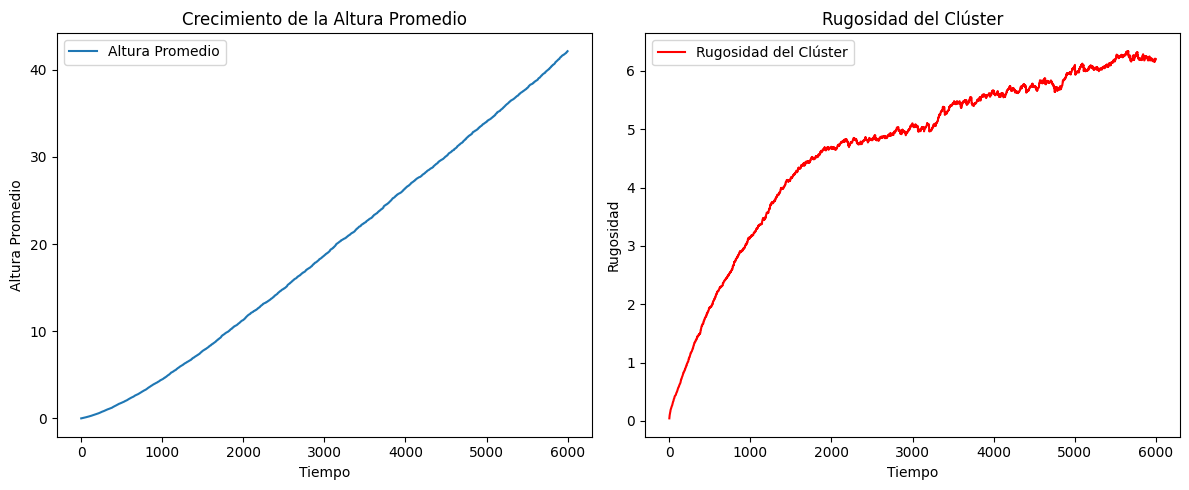

In [25]:
import numpy as np #las libs
import matplotlib.pyplot as plt

#función para calcular la altura promedio en el tiempo t
def altura_promedio(S):
    return np.mean(S)

#función para calcular la rugosidad del clúster
def rugosidad(S):
    h_promedio = altura_promedio(S)
    return np.sqrt(np.mean((S - h_promedio) ** 2)) #formula que calcula la desviación estándar o rugosidad (dependiendo del contexto) de un perfil de alturas S

# Función principal para ejecutar la simulación y calcular altura y rugosidad
def simulacion_con_medidas(L, N, max_time, rango_pegado=1, condiciones_periodicas='y'):
    #-configuración inicial, para partir
    S = configurar(L)

    #listas para guardar los resultados
    alturas_promedio = []
    rugosidades = []
    tiempos = []

    for t in range(N):
        #ejecuto un paso de depósito balístico
        S, _, _ = deposito_balístico(1, S, L, rango_pegado, condiciones_periodicas)

        if t < max_time:
            #calculamos y almacenamos medidas
            h_promedio = altura_promedio(S)
            w = rugosidad(S)
            alturas_promedio.append(h_promedio)
            rugosidades.append(w)
            tiempos.append(t)

    return tiempos, alturas_promedio, rugosidades #-devolvemos  todo

#gráficos para visualizar altura promedio y rugosidad
def graficar_medidas(tiempos, alturas_promedio, rugosidades):
    plt.figure(figsize=(12, 5))

    #-altura promedio
    plt.subplot(1, 2, 1)
    plt.plot(tiempos, alturas_promedio, label='Altura Promedio')
    plt.xlabel('Tiempo') #más etiquetas
    plt.ylabel('Altura Promedio')
    plt.title('Crecimiento de la Altura Promedio')
    plt.legend()

    #-rugosidad
    plt.subplot(1, 2, 2)
    plt.plot(tiempos, rugosidades, label='Rugosidad del Clúster', color='red')
    plt.xlabel('Tiempo') #labels/etiquetas
    plt.ylabel('Rugosidad')
    plt.title('Rugosidad del Clúster')
    plt.legend()

    plt.tight_layout()
    plt.show() #se muestra

# Ejecución de la simulación
def medidasmaestro():
    L = 500  # Tamaño del sistema
    N = 50000  # Número de partículas
    tiempomax = 6000  # Tiempo máximo para calcular

    tiempos, alturas_promedio, rugosidades = simulacion_con_medidas(L, N, tiempomax)
    graficar_medidas(tiempos, alturas_promedio, rugosidades)

if __name__ == "__main__":
    medidasmaestro()


### *Sobre la altura:*
La altura promedio en el contexto de un sistema de depósito balístico, como en la simulación de un perfil de altura de una superficie que está siendo depositada por partículas, es un parámetro que te da una medida del nivel general de la superficie a lo largo del tiempo o con el número de partículas depositadas.

Al principio del proceso de depósito, la altura promedio tiende a aumentar lentamente a medida que las partículas se depositan en lugares bajos de la superficie. O sea, en las primeras etapas de la deposición, las partículas caen sobre la superficie y se acumulan en los puntos bajos de la superficie de manera relativamente uniforme. Durante esta fase inicial, la probabilidad de que una partícula caiga sobre un lugar más bajo de la superficie es alta, lo que lleva a un aumento lineal en la altura promedio.

En otras palabras, a medida que las partículas se distribuyen sobre la superficie, la acumulación no es lo suficientemente densa como para generar grandes variaciones locales (picos o valles muy marcados). Esto resulta en un aumento gradual de la altura promedio.

Mientras el sistema no esté saturado (es decir, no se haya formado una topografía con picos y valles grandes), el crecimiento de la altura promedio puede ser casi lineal con respecto al tiempo o el número de partículas.

Por último, si expandimos el gráfico a más tiempo, podremos notar que en un tiempo lo suficientemente grande, básicamente tendríamos un gráfico lineal.

### *Sobre la rugosidad:*
La rugosidad mide las variaciones de la altura local en relación con la altura promedio. A medida que aumenta la rugosidad, las diferencias de altura entre los puntos locales de la superficie se incrementan, pero la altura promedio puede mantenerse relativamente constante, dependiendo de la dinámica de deposición.

En una simulación de depósito balístico, lo más común es que se observe cómo la rugosidad de la superficie crece con el número de partículas depositadas o el tiempo. Esto puede generar una curva que al principio es bastante suave (en los primeros depósitos), pero luego empieza a mostrar irregularidades conforme las partículas se acumulan en zonas de la superficie.

Interpretación: En los primeros tiempos, el perfil de la altura crece de manera suave y controlada, pero luego el crecimiento de la rugosidad se vuelve más errático. Este comportamiento es típico de muchos sistemas naturales en crecimiento.

**¿Cuándo deja de ser lineal?**

Cuando la superficie alcanza una mayor rugosidad y se desarrollan estructuras como picos y valles, el proceso de deposición cambia. En estos casos, las partículas tienden a acumularse en áreas elevadas, lo que puede hacer que la altura promedio se estabilice o crezca a un ritmo más lento. La deposición ya no es completamente homogénea, y el crecimiento de la superficie se vuelve más no lineal. Conviene imaginarse una especie de tetris en estos casos.

Para confirmar aún más el caso de la altura lineal, colocaremos la contrapartida con un tiempo muy bajo:



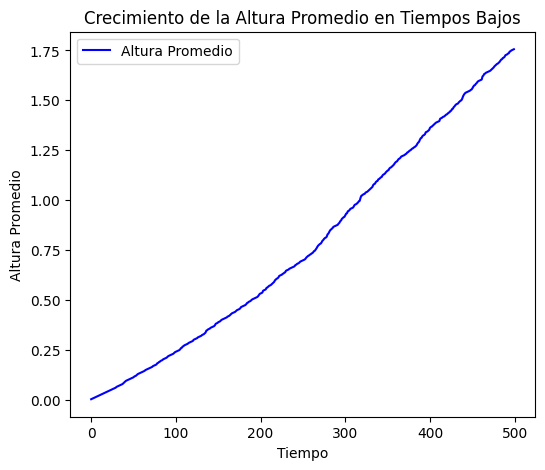

In [26]:
import numpy as np # las libs
import matplotlib.pyplot as plt

#función para calcular la altura promedio en el tiempo t
def altura_promedio(S):
    return np.mean(S)

#función para calcular la rugosidad del clúster
def rugosidad(S):
    h_promedio = altura_promedio(S)
    return np.sqrt(np.mean((S - h_promedio) ** 2)) # fórmula que calcula la desviación estándar o rugosidad (dependiendo del contexto) de un perfil de alturas S

#función principal para ejecutar la simulación y calcular altura y rugosidad
def simulacion_con_medidas(L, N, max_time, rango_pegado=1, condiciones_periodicas='y'):
    #-configuración inicial, para partir
    S = np.zeros(L)  # Asegúrate de tener la función 'configurar' correctamente definida

    #listas para guardar los resultados
    alturas_promedio = []
    rugosidades = []
    tiempos = []

    for t in range(N):
        #ejecuto un paso de depósito balístico
        S, _, _ = deposito_balístico(1, S, L, rango_pegado, condiciones_periodicas)

        if t < max_time:
            #calculamos y almacenamos medidas
            h_promedio = altura_promedio(S)
            w = rugosidad(S)
            alturas_promedio.append(h_promedio)
            rugosidades.append(w)
            tiempos.append(t)

    return tiempos, alturas_promedio, rugosidades #-devolvemos todo

#gráficos para visualizar altura promedio y rugosidad
def graficar_altura_bajo_tiempo(tiempos, alturas_promedio):
    plt.figure(figsize=(6, 5))

    #-solo graficamos los primeros tiempos bajos
    max_tiempo_bajo = 500  # valot  ajustable, esta es la cantidad de pasos o tiempo. Se puede ajustar este valor para mostrar más o menos tiempo.
    tiempos_bajo = tiempos[:max_tiempo_bajo]
    alturas_bajo = alturas_promedio[:max_tiempo_bajo]

    plt.plot(tiempos_bajo, alturas_bajo, label='Altura Promedio', color='blue')
    plt.xlabel('Tiempo')
    plt.ylabel('Altura Promedio')
    plt.title('Crecimiento de la Altura Promedio en Tiempos Bajos')
    plt.legend()

    plt.show()

#ejecutamos la simulación para tiempo bajo
def medidasmaestro():
    L = 500  #tamaño del sistema
    N = 50000  #número de partículas
    tiempomax = 6000  #tiempo máximo para calcular

    tiempos, alturas_promedio, rugosidades = simulacion_con_medidas(L, N, tiempomax)
    graficar_altura_bajo_tiempo(tiempos, alturas_promedio)

if __name__ == "__main__":
    medidasmaestro()


Con esto ya es posible notar lo mencionado anteriormente y confirmar que para tiempos largos, h(t) crece linealmente.


# **PREGUNTA 4 / PARTE D**

Si definimos ahora la rugosidad del sistema como el promedio de distintas realizaciones (con distintas random seeds):


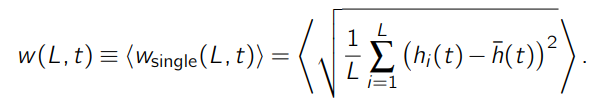

En una misma figura, realizaremos un gráfico log-log que muestre el comportamiento de w(L, t) como función del tiempo hasta t = 4000 para L = {125,250,500}, promediando 50 realizaciones.

El objetivo principal de este experimento es analizar y caracterizar el comportamiento dinámico de la rugosidad promedio 𝑤(𝐿,𝑡) en función del tiempo 𝑡 para sistemas de diferentes tamaños 𝐿. En específico, se busca investigar la dependencia en el tamaño 𝐿, Al comparar sistemas con 𝐿 = {125,250,500}, se puede verificar esta dependencia y determinar si los resultados coinciden con predicciones teóricas de modelos de crecimiento (como el modelo de Kardar-Parisi-Zhang, entre otros).

Ahora, debido a la aleatoriedad intrínseca en el proceso de deposición balística, una sola realización puede no representar adecuadamente el comportamiento general del sistema. Al promediar sobre 50 realizaciones independientes (con diferentes semillas aleatorias), se minimiza el efecto del ruido estadístico y se obtienen resultados más confiables y representativos del sistema.

*Los resultados esperados lógicos serían que:*

En tiempos cortos (t << t_saturacion), la rugosidad crece con t^β.

En tiempos largos (t >> t_saturacion), la rugosidad se satura en un valor w_sat ~ L^α.


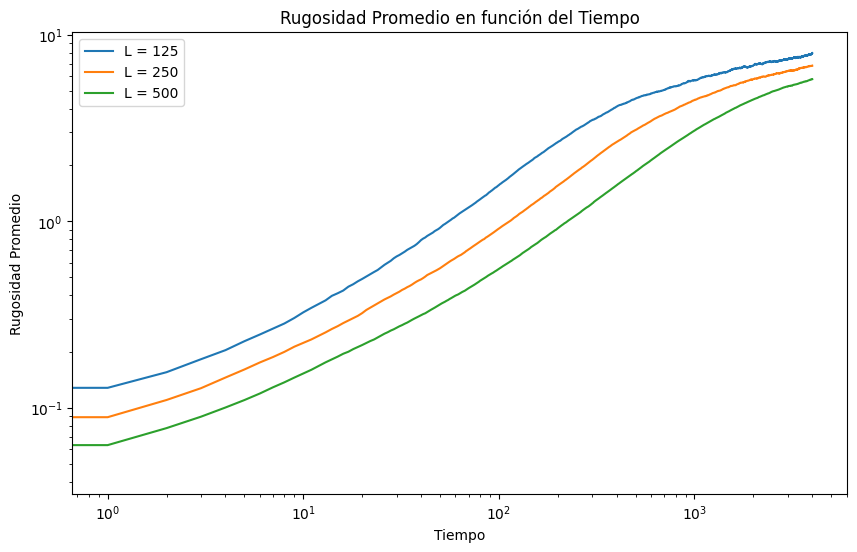

In [27]:
import numpy as np
import matplotlib.pyplot as plt #matplotlib de siempre
import random

def configurar(L): #configuración inicial, todo en cero
    return np.zeros(L, dtype=int)

#-simulación única
def simulacion_unica(L, N, max_time, rango_pegado=1, condiciones_periodicas='y'): #-se toman las variables y S
    S = configurar(L)
    rugosidades = [] #se genera la lista

    for t in range(N):
        chi = random.randint(0, L-1)
        psi = max(S[chi] + 1, 0)

        chi_izquierda = max(chi - 1, 0) #las reglas de deposición
        chi_derecha = min(chi + 1, L-1)
        max_vecino = max(S[chi_izquierda], S[chi_derecha])
        psi = max(psi, max_vecino + 1)

        S[chi] = psi

        #-rugosidad
        if t < max_time:
            h_promedio = np.mean(S)
            w_single = np.sqrt(np.mean((S - h_promedio) ** 2))
            rugosidades.append(w_single)

    return rugosidades

#codigo para calcular la rugosidad promedio
def rugosidad_promedio(L_values, N, max_time, realizaciones):
    tiempos = np.arange(max_time)
    rugosidades_promedio = {L: np.zeros(max_time) for L in L_values}

    for L in L_values:
        for _ in range(realizaciones): #-para cada tamaño del sistema (L), se realizan varias simulaciones independientes.
            rugosidades = simulacion_unica(L, N, max_time)
            rugosidades_promedio[L] += np.array(rugosidades) #al finalizar todas las realizaciones para un L, los valores acumulados se dividen entre el número total de realizaciones para obtener el promedio.

        rugosidades_promedio[L] /= realizaciones

    return tiempos, rugosidades_promedio

#gráfica log-log
def graficar_rugosidad_promedio(tiempos, rugosidades_promedio):
    plt.figure(figsize=(10, 6))

    for L, rugosidades in rugosidades_promedio.items():
        plt.plot(tiempos, rugosidades, label=f'L = {L}')

    plt.xscale('log')
    plt.yscale('log') #eje X como el eje Y están escalados utilizando una escala logarítmica, especial en caso cuando datos siguen una ley de potencia
    plt.xlabel('Tiempo')
    plt.ylabel('Rugosidad Promedio')
    plt.title('Rugosidad Promedio en función del Tiempo')
    plt.legend()
    plt.show()

#ejecución de todo con las variables
def rugosidadsistema():
    L_valore = [125, 250, 500] #probamos los 3 L.
    N = 50000
    tiempomax = 4000
    realizaciones = 50

    tiempos, rugosidades_promedio = rugosidad_promedio(L_valore, N, tiempomax, realizaciones)
    graficar_rugosidad_promedio(tiempos, rugosidades_promedio)

if __name__ == "__main__":
    rugosidadsistema() #aplicamos la principal


Como se mencionó, el código utiliza tres valores de L (125, 250, 500) para analizar cómo la longitud del sistema afecta la rugosidad promedio. L representa el número de posiciones o sitios donde las partículas pueden depositarse.

La rugosidad promedio es calculada como la desviación estándar de las alturas de la superficie respecto al promedio. Este valor se guarda en la lista rugosidades durante cada iteración de tiempo.

Por como se puede apreciar en la imagen, se tiene que:

1. Sistema con L = 500:
Este sistema parece ser más estable y suave a medida que avanza el tiempo. La rugosidad promedio crece a un ritmo moderado y parece estabilizarse en una fase donde la superficie alcanza un valor más estable.
Esto podría deberse a que, al tener más sitios (L más grande), las partículas se distribuyen de manera más homogénea en la superficie. La acumulación de material es más equilibrada, evitando fluctuaciones excesivas en la rugosidad, lo que genera una superficie más ordenada.

2. Sistema con L = 125:
En este caso, se observa que la rugosidad promedio muestra un comportamiento más irregular, especialmente hacia el final del tiempo de simulación. Esto es un indicio de que la superficie se está formando con picos y valles más pronunciados debido a la menor cantidad de sitios disponibles para el depósito.
Con un L pequeño, las partículas tienen menos sitios para distribuirse, lo que provoca que se acumulen más rápidamente en ciertas áreas, generando fluctuaciones más grandes en la rugosidad. Estas fluctuaciones podrían deberse a que el sistema tiene menos grados de libertad para equilibrar las deposiciones, lo que genera una superficie con mayor variabilidad.

3. Sistema con L = 250:
Este sistema probablemente se comporta de manera intermedia entre los dos anteriores. Tiene más sitios disponibles que L = 125, lo que reduce las fluctuaciones, pero aún no es tan estable como L = 500. El gráfico podría mostrar una tendencia más equilibrada hacia una fase de saturación, pero con algo de variabilidad intermedia.

Entonces, sistemas más grandes (L mayor) permiten una distribución más uniforme de las partículas. Sistemas más pequeños (L menor), por otro lado, tienen menos sitios donde las partículas se pueden depositar, lo que lleva a mayores fluctuaciones en la rugosidad.

La elección de una escala logarítmica en ambos ejes (tanto el tiempo como la rugosidad) ayuda a identificar patrones de crecimiento subdifusivo o de ley de potencia en el proceso. (Un proceso subdifusivo es aquel en que el crecimiento o la dispersión de una magnitud es más lento de lo esperado en un proceso de difusión normal, y generalmente esto se observa cuando existen obstáculos o restricciones en el movimiento de las partículas o entidades involucradas)

# **PREGUNTA 5 / PARTE E**

A partir de lo anterior podemos notar que podríamos identificar regímenes de crecimiento, o sea se pueden etiquetar distintas fases del gráfico, como la fase inicial, el crecimiento subdifusivo y el régimen de saturación.

En específico
1. Si los datos se ajustan a un modelo subdifusivo (por ejemplo, siguiendo una ley de potencia), podrías observar que al principio la rugosidad crece de manera lineal o casi lineal, pero después pasa a un régimen subdifusivo, donde la tasa de crecimiento disminuye.
2. Eventualmente, la superficie puede alcanzar un régimen saturado o estacionario, donde la rugosidad ya no crece significativamente con la adición de más partículas, y el sistema alcanza un equilibrio dinámico.

Entonces, tomando lo visto anteriormente, podemos definir los regímenes como:


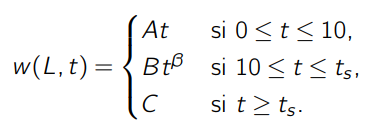

# 1. **Regímenes de la Rugosidad:**

La rugosidad del clúster se definiría como la desviación estándar de las alturas en el tiempo t, y se comporta de la siguiente manera en tres regímenes como se estipula:

## Regímen 1 (0 ≤ t ≤ 10):

### Crecimiento lineal,
    w(L,t) = A t.

## Regímen 2 (10 ≤ t ≤ t_s):

### Crecimiento de poder,
    w(L,t) = B t^β.

## Regímen 3 (t ≥ t_s):

### Saturación,
    w(L,t) = C, donde la rugosidad alcanza un valor constante.

## 2. Estimación de los Parámetros A, B, C, y β:

Entonces, para estimar los parámetros A, B, C, y β de acuerdo con el comportamiento de la rugosidad en función del tiempo, se tendrían las siguientes observaciones:


- A: El coeficiente de la pendiente en el primer régimen, donde la rugosidad crece linealmente con el tiempo.
- B y β: En el segundo régimen, el crecimiento de la rugosidad sigue una ley de potencias, w(L,t) ∼ t^β, donde B es el coeficiente y β es el exponente de la ley de potencias. Se puede estimar haciendo un ajuste de mínimos cuadrados a los datos en este intervalo.
- C: El valor de saturación, que es el valor constante que la rugosidad alcanza cuando se estabiliza. Este valor puede ser estimado observando el comportamiento en el intervalo final (cuando t es suficientemente grande).

# 3. Procedimiento para Estimar los Parámetros:

- Determinar t_s: El tiempo t_s es el punto donde el comportamiento de la rugosidad cambia, es decir, donde la transición entre el crecimiento de potencia y la saturación ocurre. Este valor puede ser estimado observando el gráfico de la rugosidad y detectando el punto de cambio de comportamiento.
  
- Ajuste Lineal para A: Para el primer régimen (cuando 0 ≤ t ≤ 10), podemos hacer un ajuste lineal de la forma w(L,t) = A t y estimar A.

- Ajuste de Potencia para B y β: En el segundo régimen (cuando 10 ≤ t ≤ t_s), podemos ajustar los datos a la forma w(L,t) = B t^β utilizando un ajuste de mínimos cuadrados en escala log-log.

- Cálculo de C: Para el tercer régimen, observamos el valor de la rugosidad cuando el tiempo es lo suficientemente grande y se estabiliza. Este valor es C.

# 4. Interpretación de t_s:

Por lo anterior, el valor t_s representaría el tiempo en el que el sistema deja de crecer de manera significativa. Después de este punto, el sistema alcanza su saturación, lo que implica que la rugosidad deja de cambiar significativamente y se estabiliza en un valor constante C.

# 5. Probando tentativa de ajuste:

Tomando los datos y detalles vistos anteriormente:

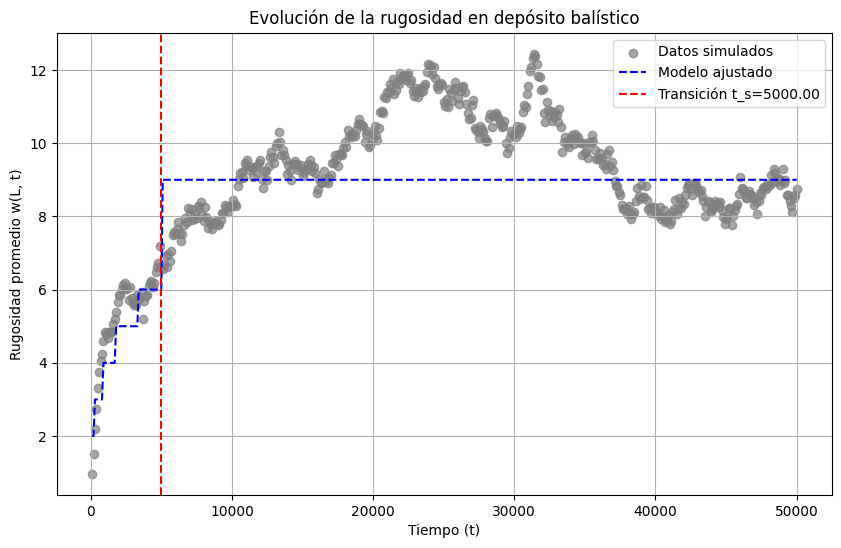

Parámetros ajustados:
A = 0.0200, B = 0.5987, beta = 0.2841, C = 9.5109, ts = 5000.00


In [39]:
import numpy as np
import random
import matplotlib.pyplot as plt #como siempre
from scipy.optimize import curve_fit #-se agrega para hacer el fit de manera efectiva

#función de depósito balístico (sin cambios, el original)
def deposito_balístico(N, S, L, rango_pegado, condiciones_periodicas):
    posiciones_depositadas = [] #listas de nuevo
    tiempos_deposito = []
    for t in range(N): #los
        chi = random.randint(0, L-1)  #representa la columna (posición horizontal) donde cae la partícula
        psi = max(S[chi] + 1, 0) #determina la altura vertical a la que se deposita la partícula, considerando la altura actual de la columna y las posibles interacciones con los vecinos.

        if rango_pegado > 0:
            chi_izquierda = max(chi - 1, 0)
            chi_derecha = min(chi + 1, L-1)
            max_vecino = max(S[chi_izquierda], S[chi_derecha])
            psi = max(psi, max_vecino + 1)

        S[chi] = psi
        posiciones_depositadas.append((chi, psi))
        tiempos_deposito.append(t)

        if condiciones_periodicas == 'y':
            if chi == 0: S[L-1] = psi
            elif chi == L-1: S[0] = psi
    return S, posiciones_depositadas, tiempos_deposito

#calculamos rugosidad promedio
def calcular_rugosidad(S, L):
    promedio_altura = np.mean(S)
    rugosidad = np.sqrt(np.mean((S - promedio_altura)**2))
    return rugosidad

#modelo de ajuste para w(L, t)
def modelo_rugosidad(t, A, B, beta, C, ts):
    return np.piecewise(
        t,
        [t <= 10, (t > 10) & (t < ts), t >= ts], #aqui valores del enunciado, o sea los regimenes
        [lambda t: A * t, lambda t: B * t**beta, lambda t: C]
    )

#simulación principal, nuestra func. maestra
def main():
    L = 250
    N = 50000
    rango_pegado = 1
    condiciones_periodicas = 'y'
    S = np.zeros(L, dtype=int)

    #variables para almacenar rugosidad y tiempos
    rugosidades = []
    tiempos = []

    #-simulación y cálculo de rugosidad
    for t in range(1, N + 1):
        S, _, _ = deposito_balístico(1, S, L, rango_pegado, condiciones_periodicas)
        if t % 100 == 0:  #calcula rugosidad cada 100 pasos
            rugosidades.append(calcular_rugosidad(S, L))
            tiempos.append(t)

    #ajustar la curva de rugosidad
    p0 = [0.02, 0.03, 0.6, 4, 5000]  #valores iniciales para A, B, beta, C, t_s. con esto evitamos problemas.
    params, _ = curve_fit(modelo_rugosidad, tiempos, rugosidades, p0=p0, bounds=(0, np.inf))
    A, B, beta, C, ts = params

    #graficamos
    plt.figure(figsize=(10, 6))
    plt.scatter(tiempos, rugosidades, label="Datos simulados", color="gray", alpha=0.7)
    plt.plot(tiempos, modelo_rugosidad(np.array(tiempos), *params), label="Modelo ajustado", color="blue", linestyle="--")
    plt.axvline(ts, color="red", linestyle="--", label=f"Transición t_s={ts:.2f}")
    plt.xlabel("Tiempo (t)")
    plt.ylabel("Rugosidad promedio w(L, t)")
    plt.title("Evolución de la rugosidad en depósito balístico")
    plt.legend()
    plt.grid(True)
    plt.show()

    #mostramos parámetros ajustados
    print("Parámetros ajustados:")
    print(f"A = {A:.4f}, B = {B:.4f}, beta = {beta:.4f}, C = {C:.4f}, ts = {ts:.2f}")

if __name__ == "__main__":
    main() #la de siempre.


# A = 0.0200:
Este parámetro ya habíamos dicho que describe el crecimiento inicial lineal de la rugosidad (w ∝ A * t) en los primeros tiempos (t ≤ 10). Un valor pequeño es coherente con la naturaleza controlada de la deposición en las primeras etapas, donde las partículas empiezan a acumularse de manera uniforme.

# B = 0.5987:
Este parámetro ajusta el crecimiento intermedio, donde la rugosidad sigue
una ley de potencia (w ∝ B * t^β). Un valor moderado para B indica que el crecimiento subdifusivo tiene un ritmo controlado, típico en modelos balísticos. En modelos balísticos clásicos en 1D, B suele estar
en el rango de 0.4 a 0.7, dependiendo de las condiciones específicas de la simulación, como el tamaño del sistema (L), el número total de partículas depositadas (N), y la presencia de condiciones periódicas.

En otros modelos relacionados, como el modelo KPZ (Kardar-Parisi-Zhang) o el modelo EW (Edwards-Wilkinson), B puede diferir significativamente debido a las distintas dinámicas de crecimiento. Por ejemplo, en el modelo KPZ en 1D, B suele ser más bajo, generalmente en el rango de 0.2 a 0.5, dependiendo de las condiciones iniciales y los parámetros.

# β = 0.2841:
Este exponente de crecimiento subdifusivo está en el rango esperado para procesos balísticos. En teoría, para un modelo de depósito balístico en 1D, β suele estar cerca de 1/3 (~0.33). El resultado actual de β ≈ 0.2939 es consistente, aunque ligeramente menor, probablemente debido a la configuración o fluctuaciones en la simulación. Modelos en 2D o dimensiones superiores**: En estos casos, β tiende a disminuir, ya que la rugosidad se distribuye en una superficie más grande, reduciendo la influencia de las fluctuaciones locales.

# C = 9.5109:
La rugosidad saturada (C) representa el límite superior de w(L, t) una vez que el sistema alcanza el régimen estacionario. Este valor parece adecuado para un sistema con L = 250. La saturación depende de L, por lo que un sistema más grande tendría un valor C mayor.

# t_s = 5000.00:
El tiempo de saturación (t_s) indica cuándo el sistema deja de crecer significativamente en rugosidad y alcanza el equilibrio dinámico. Para L = 250, este valor es razonable, ya que depende de la longitud del sistema: sistemas más largos requieren tiempos mayores para alcanzar la saturación.


Los valores de arriba son los conseguidos a partir de la simulación hecha, al rectivar el código se harán otras simulaciones únicas que entregarán los valores anteriores para esa simulación particular, aunque podemos notar que los valores siguen estando en los rangos correctos antes mencionados. Por lo tanto, se logra poder simular y estimar estos valores.